<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# 1.

### <span style = 'color : blue'>  데이터 셋에 대한 이해

Data description  
There are 3 types of input features:  

Objective: factual information;  
Examination: results of medical examination;  
Subjective: information given by the patient.  

Features:  

| 항목 | 항목 종류 | 형식 | 설명 | 
| --- | --- | --- | --- |
Age | Objective Feature | int (days)  | 나이  
Gender | Objective Feature | categorical code (1=여,  2=남)| 성별  
Height | Objective Feature | int (cm) |  키  
Weight | Objective Feature | float (kg) |  몸무게  
ap_hi | Examination Feature | int | Systolic blood pressure 수축기 혈압  
ap_lo | Examination Feature | int |  Diastolic blood pressure 확장기 혈압  
Cholesterol | Examination Feature | 1: normal, 2: above normal, 3: well above normal |  콜레스트롤  
gluc | Examination Feature | 1: normal, 2: above normal, 3: well above normal | Glucose 포도당  
smoke | Subjective Feature | binary (0 = False, 1 = True)| Smoking 흡연 여부  
alco | Subjective Feature | binary (0 = False, 1 = True)| Alcohol intake 알콜 섭취 여부  
active | Subjective Feature | binary (0 = False, 1 = True)|  Physical activity 운동 여부  
cardio | Target Variable | binary (0 = False, 1 = True)|  Presence or absence of cardiovascular disease 심혈관 질환 여부  

All of the dataset values were collected at the moment of medical examination.  

### <span style = 'color : blue'> 각종 항목들을 통해 심혈관 질환 여부를 알아보자

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')
df.drop('id',axis=1,inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
### 이곳에서 과제를 진행해 주세요 ###

# 결측치와 데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [3]:
# df.duplicated = 중복된 항목들 체크. 중복된 개수에서 1개는 빼고 보여줌. (ex - 3개가 같은 데이터면 2개로 나옴)
# parameter 'keep = "first" or "last" or "False" 설정 가능. False로 하면 중복된 것 모두 셈.
df.duplicated().sum()

24

In [4]:
# 중복 데이터 확인
df[df.duplicated() == True]

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
10562,20495,1,165,70.0,120,80,1,1,0,0,1,0
21784,16793,1,165,68.0,120,80,1,1,0,0,1,0
38505,18988,1,164,65.0,120,80,1,1,0,0,1,0
40365,14552,1,158,64.0,120,80,1,1,0,0,1,0
42450,18353,1,169,67.0,120,80,1,1,0,0,1,0
44653,16937,2,170,70.0,120,80,1,1,0,0,0,0
45125,21280,1,165,65.0,120,80,1,1,0,0,1,0
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1
45810,21230,1,164,62.0,120,80,1,1,0,0,1,0
48917,21945,1,165,60.0,120,80,1,1,0,0,1,0


In [5]:
# 중복 데이터 드랍
duplicated = df[df.duplicated() == True].index
df.drop(duplicated, inplace = True)
df.duplicated().sum()

0

In [6]:
# 남은 샘플 수
len(df)

69976

------

----


# 2.

In [7]:
### 이곳에서 과제를 진행해 주세요 ###

# train / val / test 나누기

from sklearn.model_selection import train_test_split

X = df[df.columns.difference(['cardio'])]
y = df['cardio']

X_train_val_raw, X_test_raw, y_train_val, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 2)

X_train_raw, X_val_raw, y_train, y_val = train_test_split(X_train_val_raw, y_train_val, train_size = 0.8, test_size = 0.2, random_state = 2)

print(X_train_raw.shape)
print(y_train.shape)
print(X_val_raw.shape)
print(y_val.shape)
print(X_test_raw.shape)
print(y_test.shape)

print(df.shape)
print(X_train_raw.shape[0] + X_val_raw.shape[0] + X_test_raw.shape[0] == df.shape[0])



(44784, 11)
(44784,)
(11196, 11)
(11196,)
(13996, 11)
(13996,)
(69976, 12)
True


In [8]:
# X_val 개수
print(len(X_val_raw))

11196


----


----


# 3.

In [9]:
### 이곳에서 과제를 진행해 주세요 ###

# Target 의 빈도 확인

y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

<AxesSubplot:xlabel='cardio', ylabel='count'>

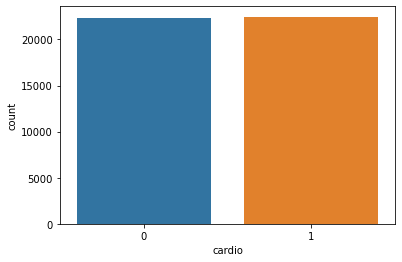

In [10]:
# 시각화
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train)

In [11]:
# 최빈값을 기준 모델로 설정
major = y_train.mode()[0]

# 기준 모델의 정확도 확인 (해당 데이터의 '1' 빈도수와 같음)
from sklearn.metrics import accuracy_score
y_pred_train_major = [major] * len(y_train)
print("training accuracy: ", accuracy_score(y_train, y_pred_train_major))
y_pred_val_major = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred_val_major))


training accuracy:  0.501697034655234
validation accuracy:  0.49821364773133264


In [12]:
### 이곳에서 과제를 진행해 주세요 ###

# 로지스틱회귀 모델 만들기
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver='liblinear', max_iter=1000)
logistic.fit(X_train_raw, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [13]:
print('검증세트 정확도', logistic.score(X_val_raw, y_val))

검증세트 정확도 0.7120400142908182


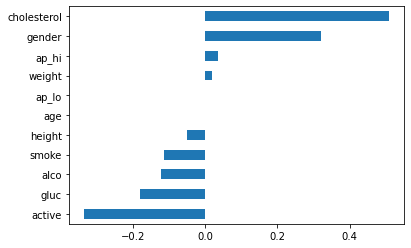

In [14]:
coefficients = pd.Series(logistic.coef_[0], X_train_raw.columns)
coefficients.sort_values().plot.barh();

----


----


# 4.

In [15]:
### 이곳에서 과제를 진행해 주세요 ###

from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# encoder로 범주형 변수 -> feature로 전환
encoder = OneHotEncoder(use_cat_names = True, cols = 'gender' )

X_train_encoded = encoder.fit_transform(X_train_raw) 
X_val_encoded = encoder.transform(X_val_raw)
X_test_encoded = encoder.transform(X_test_raw)

#결측치가 없는 걸 확인했으므로 simpleimputer는 생략


C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [16]:
# gender 인코딩 확인
X_train_encoded.head()

,active,age,alco,ap_hi,ap_lo,cholesterol,gender_1.0,gender_2.0,gluc,height,smoke,weight
221,0,17591,0,160,100,3,1,0,1,157,0,70.0
59211,1,19677,0,150,80,1,0,1,1,174,0,80.0
26654,1,23504,0,140,90,3,1,0,3,158,0,76.0
33421,0,18036,1,160,110,3,0,1,1,173,0,128.0
12046,1,20225,1,120,80,1,0,1,1,176,1,109.0


In [17]:
# 모델 학습
model_encoded = LogisticRegression(random_state=1)
model_encoded.fit(X_train_encoded, y_train)

# 검증 데이터 정확도
y_pred_encoded = model_encoded.predict(X_val_encoded)
accuracy_score(y_val, y_pred_encoded)

0.6944444444444444

active        -0.000813
age            0.000107
alco          -0.000049
ap_hi          0.036007
ap_lo          0.000424
cholesterol    0.002756
gender_1.0    -0.001049
gender_2.0     0.000598
gluc           0.000489
height        -0.050160
smoke         -0.000051
weight         0.021364
dtype: float64


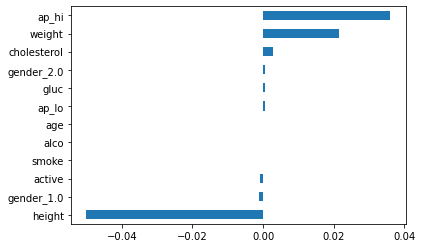

In [18]:
# feature 별 상관관계 확인
coefficients_encoded = pd.Series(model_encoded.coef_[0], X_train_encoded.columns)
print(coefficients_encoded)
coefficients_encoded.sort_values().plot.barh();

----


----


# 5.

In [19]:
### 이곳에서 과제를 진행해 주세요 ###


# 정규화 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_val_scaled = scaler.transform(X_val_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [20]:
# 표준화 확인
X_train_scaled

array([[-2.01431915, -0.7626229 , -0.23879734, ..., -0.88979708,
        -0.31338844, -0.29163052],
       [ 0.49644566,  0.08261786, -0.23879734, ...,  1.17131397,
        -0.31338844,  0.4030021 ],
       [ 0.49644566,  1.63330645, -0.23879734, ..., -0.76855525,
        -0.31338844,  0.12514905],
       ...,
       [ 0.49644566,  1.1932626 , -0.23879734, ..., -1.73848987,
        -0.31338844, -1.95874881],
       [ 0.49644566,  1.53930076, -0.23879734, ...,  0.32262119,
        -0.31338844,  0.19461232],
       [-2.01431915, -0.50856443, -0.23879734, ..., -0.28358795,
        -0.31338844, -0.29163052]])

In [21]:
# 모델 학습
model_scaled = LogisticRegression(random_state=1)
model_scaled.fit(X_train_scaled, y_train)

# 검증 데이터 정확도
y_pred_scaled = model_scaled.predict(X_val_scaled)
accuracy_score(y_val, y_pred_scaled)

0.723383351196856

active        -0.083290
age            0.369723
alco          -0.034789
ap_hi          4.732188
ap_lo          0.064723
cholesterol    0.330854
gender_1.0    -0.004895
gender_2.0     0.004895
gluc          -0.066514
height        -0.047087
smoke         -0.045082
weight         0.227550
dtype: float64


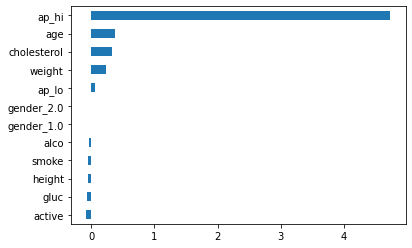

In [22]:
# feature 별 상관관계 확인
coefficients_scaled = pd.Series(model_scaled.coef_[0], X_train_encoded.columns)
print(coefficients_scaled)
coefficients_scaled.sort_values().plot.barh();

In [23]:
# 교차 검증 해보기

from sklearn.linear_model import LogisticRegressionCV
model_cv = LogisticRegressionCV(cv=5, random_state=1)
model_cv.fit(X_train_scaled, y_train)

y_pred_cv = model_cv.predict(X_val_scaled)
accuracy_score(y_val, y_pred_cv)

0.7237406216505895

In [24]:
# 스케일링 & 교차검증까지 한 데이터의 정확도가 가장 높으므로, 해당 모델을 사용
# train + val 합쳐서 다시 학습 후, test 데이터 검증

X_final_encoded = pd.concat([X_train_encoded, X_val_encoded])
y_final = pd.concat([y_train, y_val])

X_final_scaled = scaler.fit_transform(X_final_encoded)
X_test_final_scaled = scaler.transform(X_test_encoded)

model_final = LogisticRegressionCV(cv=5, random_state=1)
model_final.fit(X_final_scaled, y_final)
y_pred_final = model_final.predict(X_test_final_scaled)

accuracy_score(y_test, y_pred_final)


0.7282795084309803

In [25]:
## 그냥 한 번 해봄

import statsmodels.api as sm

X = sm.add_constant(X_train_scaled)
logit_mod = sm.Logit(y_train, X)
logit_res = logit_mod.fit(disp=0)
print(logit_res.summary())

                           Logit Regression Results                           
Dep. Variable:                 cardio   No. Observations:                44784
Model:                          Logit   Df Residuals:                    44772
Method:                           MLE   Df Model:                           11
Date:                Fri, 11 Jun 2021   Pseudo R-squ.:                  0.1500
Time:                        21:31:03   Log-Likelihood:                -26384.
converged:                       True   LL-Null:                       -31042.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0899      0.011      8.413      0.000       0.069       0.111
x1            -0.0834      0.010     -7.954      0.000      -0.104      -0.063
x2             0.3694      0.011     33.569      0.0

----


----


# 6.

# 1. 이상치 제거

In [26]:
# 이상치가 있는지 확인해보기
# ap_hi, ap_lo 항목에서 min / max 값이 이상함.

df1 = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')
df1.drop('id',axis=1,inplace=True)
df1.head()

df1.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


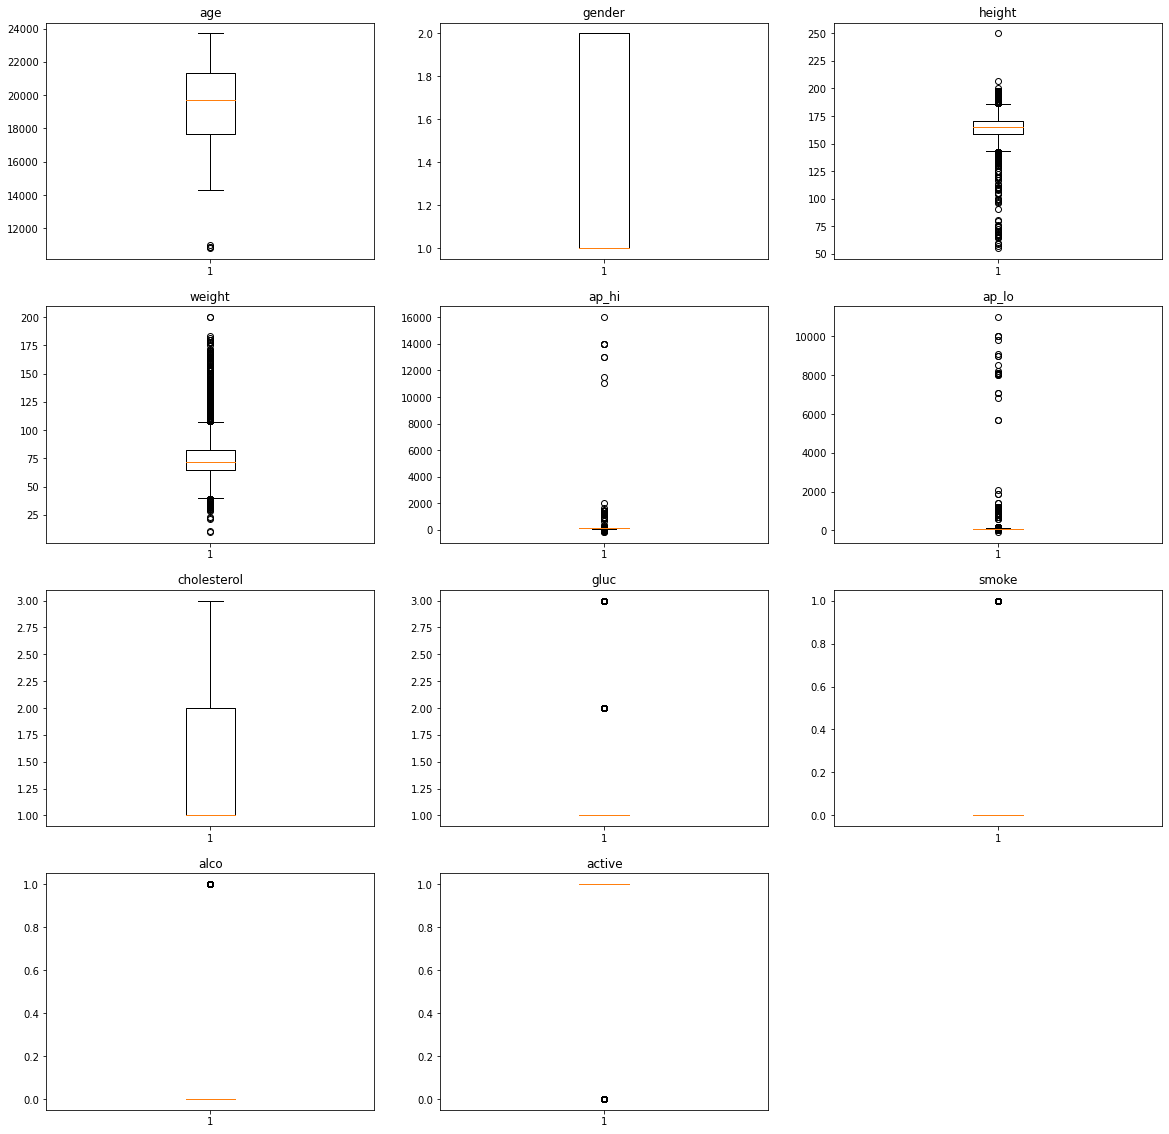

In [27]:
# boxplot으로 이상치 재확인
# ap_hi, ap_lo의 이상치가 확실히 보임
# weight 와 height도 이상치가 있어보이지만, 단정하기 어려우므로 넘어감

plt.figure(figsize=(20, 20))

for i, k in zip(range(0, len(df1.columns[:-1])), df1.columns[:-1]):
    plt.subplot (4,3,i+1)
    plt.boxplot(df1[k])
    plt.title(k)

정상 혈압 수치를 봤을 때, 데이터상 혈압이 높은 것 뿐만 아니라, 낮은 혈압도 문제가 있음 
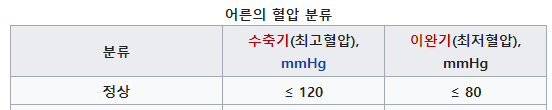


In [28]:
df1['ap_hi'].min()

-150

In [29]:
df1['ap_hi'].max()

16020

In [30]:
# 일단 큰 범위로 살펴보고, 850~ 인 수치들을 제거
import numpy as np
ranges = np.arange(df1['ap_hi'].min(), df1['ap_hi'].max()+1000, 1000)

bins_hi = list(range(df1['ap_hi'].min(), df1['ap_hi'].max()+1000, 1000))
bins_label_hi = [str(x) + "~" + str(x+1000) for x in bins_hi]

ap_hi_cut = df1['ap_hi'].groupby(pd.cut(df1['ap_hi'], ranges, right=False, labels = bins_label_hi[:-1])).count()
ap_hi_cut

ap_hi
-150~850       69964
850~1850          26
1850~2850          1
2850~3850          0
3850~4850          0
4850~5850          0
5850~6850          0
6850~7850          0
7850~8850          0
8850~9850          0
9850~10850         0
10850~11850        2
11850~12850        0
12850~13850        2
13850~14850        4
14850~15850        0
15850~16850        1
Name: ap_hi, dtype: int64

In [31]:
out_filter = (df1["ap_hi"]>850)
df1 = df1[~out_filter]

In [32]:
# 다시 좁은 범위로 살펴보고 50미만 & 250이상 인 수치들을 지워도 데이터에 문제가 없을 것이라 판단. (실제로도 존재하기 힘든 수치)

ranges2 = np.arange(df1['ap_hi'].min(), df1['ap_hi'].max()+100, 100)

bins_hi2 = list(range(df1['ap_hi'].min(), df1['ap_hi'].max()+100, 100))
bins_label_hi2 = [str(x) + "~" + str(x+100) for x in bins_hi2]

ap_hi_cut2 = df1['ap_hi'].groupby(pd.cut(df1['ap_hi'], ranges2, right=False, labels = bins_label_hi2[:-1])).count()
ap_hi_cut2

ap_hi
-150~-50        7
-50~50        181
50~150      60250
150~250      9522
250~350         1
350~450         1
450~550         0
550~650         0
650~750         1
750~850         1
Name: ap_hi, dtype: int64

In [33]:
out_filter2 = ((df1["ap_hi"] < 50) | (df1["ap_hi"] >= 250))
df1 = df1[~out_filter2]

In [34]:
# ap_lo 항목도 똑같이 진행, 우선 1000 이상인 수치 제거

ranges3 = np.arange(df1['ap_lo'].min(), df1['ap_lo'].max()+1000, 1000)

bins_lo = list(range(df1['ap_lo'].min(), df1['ap_lo'].max()+1000, 1000))
bins_label_lo = [str(x) + "~" + str(x+1000) for x in bins_lo]

ap_lo_cut = df1['ap_lo'].groupby(pd.cut(df1['ap_lo'], ranges3, right=False, labels = bins_label_lo[:-1])).count()
ap_lo_cut

ap_lo
0~1000         68853
1000~2000        895
2000~3000          0
3000~4000          0
4000~5000          0
5000~6000          2
6000~7000          1
7000~8000          2
8000~9000         11
9000~10000         4
10000~11000        3
Name: ap_lo, dtype: int64

In [35]:
out_filter3 = (df1["ap_lo"] >= 1000)
df1 = df1[~out_filter3]

In [36]:
# 다시 200 이상인 수치 제거

ranges4 = np.arange(df1['ap_lo'].min(), df1['ap_lo'].max()+100, 100)

bins_lo2 = list(range(df1['ap_lo'].min(), df1['ap_lo'].max()+100, 100))
bins_label_lo2 = [str(x) + "~" + str(x+100) for x in bins_lo2]

ap_lo_cut2 = df1['ap_lo'].groupby(pd.cut(df1['ap_lo'], ranges4, right=False, labels = bins_label_lo2[:-1])).count()
ap_lo_cut2

ap_lo
0~100       63967
100~200      4855
200~300         0
300~400         0
400~500         0
500~600         0
600~700         1
700~800         7
800~900        17
900~1000        6
Name: ap_lo, dtype: int64

In [37]:
out_filter4 = (df1["ap_lo"] >= 200)
df1 = df1[~out_filter4]

In [38]:
df1.shape

(68822, 12)

# 2. height & weight를 BMI로 통합

In [39]:
df1["bmi"] = df1["weight"]/ (df1["height"]/100)**2
df1.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [40]:
# bmi를 만들고 난 다음 height & weight를 빼야 하는가? 
# 일단 둘 다 해서 비교해보자

df2 = df1.copy()
df2.drop(["height", "weight"], axis = 1, inplace = True)

# 3. 상관관계 확인해보기

<AxesSubplot:>

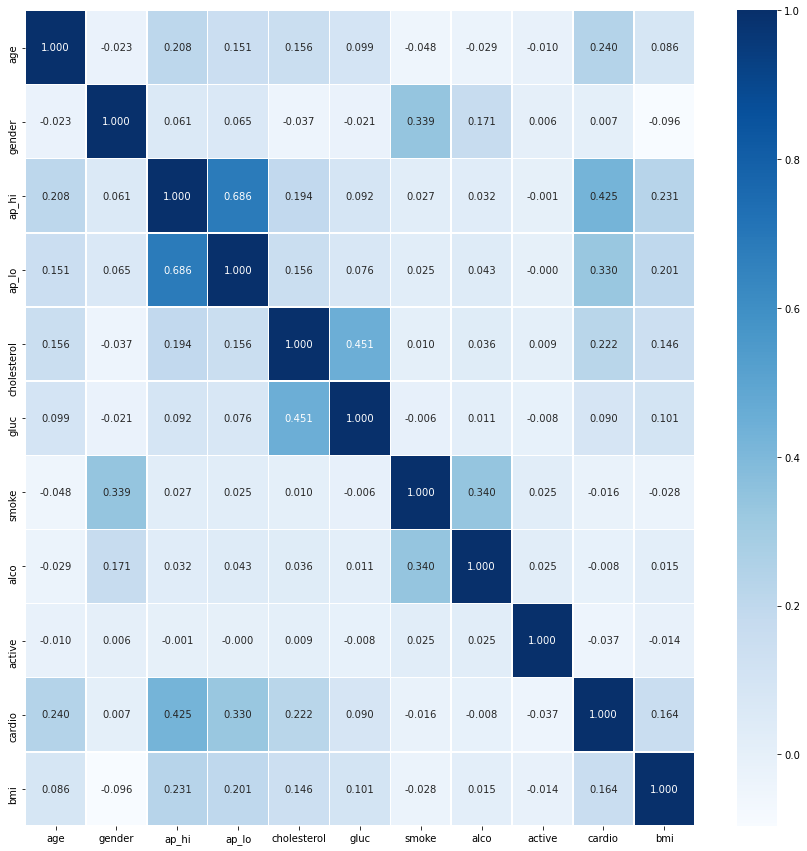

In [41]:
corr = df2.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5, ax=ax, cmap='Blues')

In [42]:
# 일단 Target인 Cardio와 높은 상관관계를 보이는 항목은 나이, 혈압, 콜레스트롤,  bmi 정도.

# 4. 데이터 정규화해서 상관관계 보기

In [43]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
df2_std = std.fit_transform(df2)

In [44]:
# 손으로 정규화 해보기

s_list = ["age", "ap_hi", "ap_lo", "bmi"]
def standartization(x):
    df2_std2 = df2.copy(deep=True)
    for column in s_list:
        df2_std2[column] = (df2_std2[column]-df2_std2[column].mean())/df2_std2[column].std()
    return df2_std2
df2_std2=standartization(df2)
df2_std2.head()

,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,-0.433972,2,-0.990955,-0.135626,1,1,0,0,1,0,-0.915932
1,0.309483,1,0.798349,0.880306,3,1,0,0,1,1,1.220349
2,-0.245981,1,0.201914,-1.151558,3,1,0,0,0,1,-0.661982
3,-0.745939,2,1.394784,1.896238,1,1,0,0,1,1,0.195572
4,-0.806307,1,-1.587390,-2.167490,1,1,0,0,0,0,-0.743841


<AxesSubplot:>

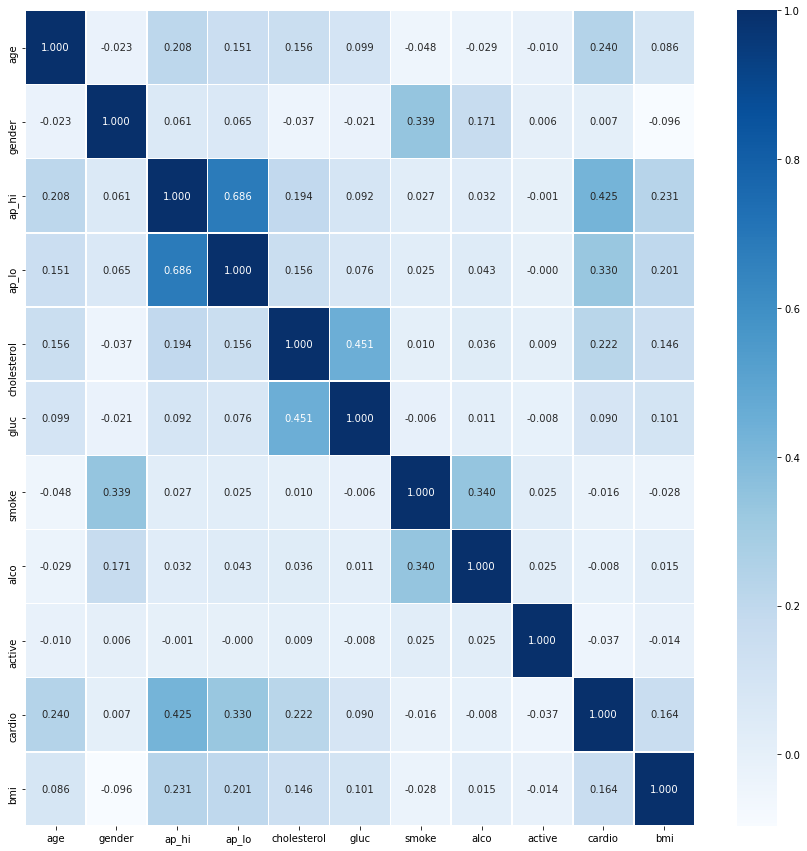

In [45]:
# 정규화 해도 상관관계는 변하지 않네

corr_std2 = df2_std2.corr()
f, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr_std2, annot=True, fmt=".3f", linewidths=0.5, ax=ax, cmap='Blues')

# 5. 카테고리 변수 encoding

In [46]:
X2 = df2[df2.columns.difference(['cardio'])]
y2 = df2['cardio']

encoder = OneHotEncoder(use_cat_names = True, cols = 'gender' )

X2_encoded = encoder.fit_transform(X2) 


C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# 6. train / test 나누기

In [47]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2_encoded, y2, train_size = 0.8, test_size = 0.2, random_state = 2)


# 7. 정규화

In [48]:
std = StandardScaler()
X2_train_std = std.fit_transform(X2_train)
X2_test_std = std.transform(X2_test)

# 8. Logistic regression - 결과

In [49]:
from sklearn.linear_model import LogisticRegressionCV

model_cv2 = LogisticRegressionCV(cv=5, random_state=2)
model_cv2.fit(X2_train_std, y2_train)

y2_pred_cv = model_cv2.predict(X2_test_std)
accuracy_score(y2_test, y2_pred_cv)

0.729095532146749

In [50]:
# 왜 cv 하는 거보다 높지?
# 일단 제일 높음

from sklearn.linear_model import LogisticRegression

model_cv3 = LogisticRegression(random_state=2, max_iter=10000)
model_cv3.fit(X2_train_std, y2_train)

y2_pred_cv3 = model_cv3.predict(X2_test_std)
accuracy_score(y2_test, y2_pred_cv3)

0.7292408281874319

In [70]:
model_cv3.score(X2_test_std, y2_test)

0.7292408281874319

# 8-1. height/weight 항목을 안 지웠을 때 결과 비교

In [51]:
# 결과가 약간 다름

X2_2 = df1[df1.columns.difference(['cardio'])]
y2_2 = df1['cardio']

encoder = OneHotEncoder(use_cat_names = True, cols = 'gender' )

X2_2_encoded = encoder.fit_transform(X2_2) 

X2_2_train, X2_2_test, y2_2_train, y2_2_test = train_test_split(X2_2_encoded, y2_2, train_size = 0.8, test_size = 0.2, random_state = 2)

X2_2_train_std = std.fit_transform(X2_2_train)
X2_2_test_std = std.transform(X2_2_test)

model_cv2_2 = LogisticRegression(random_state=2, max_iter=10000)
model_cv2_2.fit(X2_2_train_std, y2_2_train)

y2_2_pred_cv = model_cv2_2.predict(X2_2_test_std)
accuracy_score(y2_2_test, y2_2_pred_cv)

C:\Users\tkryu\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.7291681801670904

# 8-2. pipline

In [52]:
# 뭔지 모르지만 일단 써보자
# 그냥 logisticd이랑 같음

from sklearn.pipeline import make_pipeline


pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=2, max_iter=10000))
pipe.fit(X2_train, y2_train)  # apply scaling on training data


pipe.score(X2_test, y2_test)  # apply scaling on testing data, without leaking training data.


0.7292408281874319

# 8-3. RobustScaler


In [64]:
# 이상치가 많을 때 사용?
# 결과가 같음;;

from sklearn.preprocessing import RobustScaler

rob = RobustScaler()

X2_train_rob = rob.fit_transform(X2_train)
X2_test_rob = rob.transform(X2_test)



model_cv2_rob = LogisticRegression(random_state=2, max_iter=10000)
model_cv2_rob.fit(X2_train_rob, y2_train)

y2_pred_cv_rob = model_cv2_rob.predict(X2_test_rob)
print(accuracy_score(y2_test, y2_pred_cv_rob))

0.7292408281874319


# 타입폼

### 1. 중복된 샘플을 제거하고 남은 샘플의 수를 제출하세요.

In [54]:
len(df)

69976

### 2. 검증 데이터(X_val)의 갯수를 제출해 주세요.

In [55]:
len(X_val_raw)

11196

### 3. LogisticRegression 모델을 학습하고(max_iter=1000) 검증세트 정확도를 제출하세요.



In [56]:
logistic.score(X_val_raw, y_val)

0.7120400142908182

### 4. 검증세트 정확도를 제출하세요.



In [57]:
accuracy_score(y_val, y_pred_encoded)

0.6944444444444444

### 5. 테스트 세트 정확도를 제출하세요.



In [58]:
accuracy_score(y_test, y_pred_final)


0.7282795084309803